#Kohonen's Self-Organizing Feature Map (KSOFM)

We want to viualize 3D input (rgb) into 2D using SOM network. Random selection of original image pixels are given to the SOM algorithm, which then returns another photo with organized pixel's color

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class SOM :
    def __init__ (self, input_data, input_shape=(40, 40, 3), sigma=4) :
        
        self.input_data = input_data

        self.weight = self.initial_weight(input_shape)
        
        self.map_index = [(i, j) for i in range(input_shape[0]) \
                          for j in range(input_shape[1])]
        
        self.sigma = sigma
    
    #step 1 : initialization 
    def initial_weight(self, input_shape) :
        return np.array([np.random.choice(np.arange(0, 256), input_shape[2])\
                         for x in range (input_shape[0]*input_shape[1])])\
                         .reshape(input_shape).astype(float)

    #step 2 : competition 
    def calculate_nearest_node(self, input_):
        min_value, min_value_index = np.linalg.norm(input_ - self.weight[0][0] ), (0, 0)
        for j in self.map_index :
            _min_value = np.linalg.norm(input_ - self.weight[j])
            if min_value > _min_value :
                min_value = _min_value
                min_value_index = j
        return  min_value_index     


    #step 3 : Cooperation 
    def neighborhood_function (self, dist) :
        return np.exp(-(dist**2) / (2*self.sigma**2))
    
    # step 4 : Adaptation
    def update_weight(self, learning_rate, h, x):
        return learning_rate*h*x

    def train(self, epoch, learning_rate) :
        for e in range(epoch):
            print(e)
            for i in self.map_index : 
                winner = self.calculate_nearest_node(self.input_data[i]) 
                for k in  self.map_index :
                    dist = np.sum(np.power(np.array(winner) - np.array(k), 2)) ** 0.5
                    h = self.neighborhood_function(dist)    
                    self.weight[k] += self.update_weight(learning_rate, h, self.input_data[i] - self.weight[k])
           


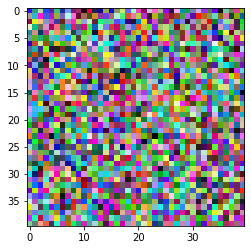

In [ ]:
def generate_random_color(dim = 1600, input_shape=(40, 40, 3)):
    color = np.array([np.random.choice(np.arange(0, 256), 3) for x in range (dim)])
    color = color.reshape(input_shape)
    plt.imshow(color)
    return color

data_set = generate_random_color()

0
1
2
3


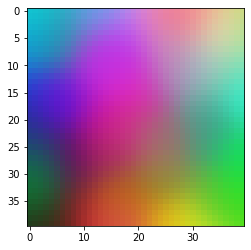

In [ ]:
som = SOM(data_set)
som.train(4, 0.5)
plt.imshow(som.weight.astype('uint8'))